***
# **<center>COURS PYTHON 2IMACS #10</center>**
# ***<center>Traitement d'images</center>***
# ***<center>Open CV</center>***
# ***<center>Scikit Image</center>***
***

Plusieurs bibliothèques Python sont disponibles pour réaliser des traitements d'images. Nous allons notamment voir comment appliquer differents filtres , seuiller des images, détecter et mesurer des objets présents dans des images.

# 10-1 Bibliothèque OpenCV

OpenCV pour Open Computer Vision est développées en C++, Python et Java, elle permet les opérations de base de traitement d'image (lecture écriture, sauvegarde, calcul d'histogrammes, seuillages...).
Elle permet également de travailler sur des vidéos.

## 10-1-1 Ouverture et Format

### 10-1-1-1 Ouverture du fichier image et affichage

OpenCv peut ouvrir la plupart des format d'images courant(jpg, png, tif, bmp...). Aprés l'importation de la bibliothèque, affectons les données contenues dans le fichier tournesols.jpg à img

In [1]:
import cv2
img = cv2.imread("fichiers_cours/traitement_image/tournesols.jpg")

Affichons l'image img et donnons lui un titre.   
**Attention:** avec k = cv2.waitKey(0) on précise que l'on attend une action pour fermer l'image, il est conseillé de la fermer avec la x en haut à droite de la fenêtre. 

In [2]:
cv2.imshow("Le titre pour le bandeau de mon image",img)
k = cv2.waitKey(0)

### 10-1-1-2 Structure de l'image

img est maintenant un tableau numpy

In [3]:
print(type(img))

<class 'numpy.ndarray'>


Visualisons ses dimensions:

In [5]:
import numpy as np
print('dimensions : ',img.shape)
# Trouver les valeurs minimale et maximale des intensité des pixels avec numpy
min_val = np.min(img)
max_val = np.max(img)
print('valeur mini pixel : ',min_val,'valeur maxi pixel : ', max_val)

dimensions :  (600, 800, 3)
valeur mini pixel :  0 valeur maxi pixel :  255


On a bien une image couleur en 3 canaux de dimension 800x600

Affichons son histogramme avec cv2.calcHist

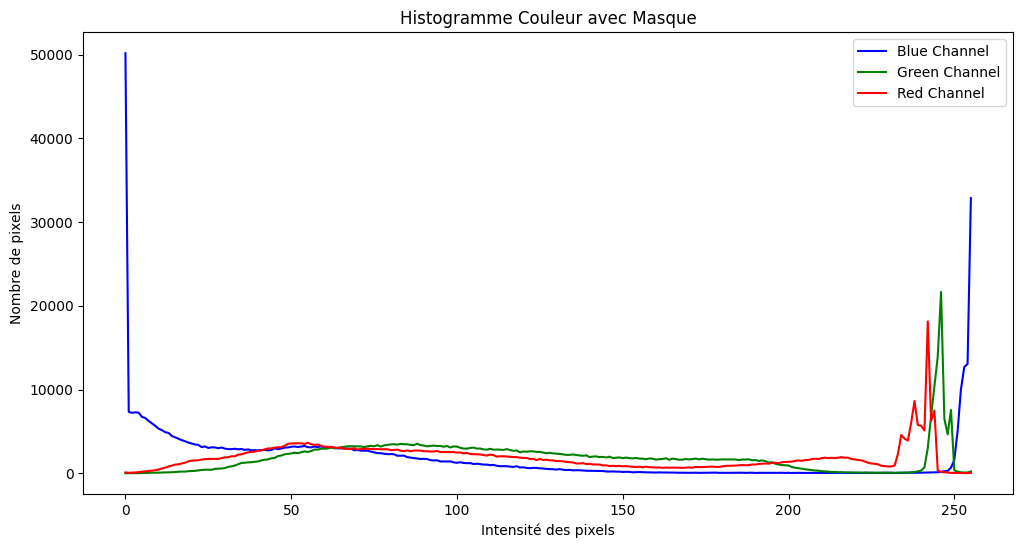

In [6]:
import matplotlib.pyplot as plt
# Décomposer les canaux de couleur
blue_channel = img[:, :, 0]
green_channel = img[:, :, 1]
red_channel = img[:, :, 2]

# Définir un masque, c'est à dire une zone de l'image sur laquelle calculer 
#l'histogramme (peut être None si vous ne voulez pas utiliser de masque)
mask = None

# Définir le nombre de bins (256 pour chaque canal)
bins = [256]

# Définir la plage des valeurs de pixel (0 à 256 pour chaque canal)
pixel_range = [0, 256]

# Calculer l'histogramme pour chaque canal de couleur avec un masque
hist_blue = cv2.calcHist([blue_channel],[0], mask, bins, pixel_range)
hist_green = cv2.calcHist([green_channel], [0], mask, bins, pixel_range)
hist_red = cv2.calcHist([red_channel], [0], mask, bins, pixel_range)



# Afficher les histogrammes
plt.figure(figsize=(12, 6))
plt.plot(hist_blue, color='blue', label='Blue Channel')
plt.plot(hist_green, color='green', label='Green Channel')
plt.plot(hist_red, color='red', label='Red Channel')
plt.title('Histogramme Couleur avec Masque')
plt.xlabel('Intensité des pixels')
plt.ylabel('Nombre de pixels')
plt.legend()
plt.show()


### 10-1-1-3 Conversion en niveau de gris

L'image peut être convertie en niveaux de gris avec **cvtColor**, c'est une étape préalable necessaire à de nombreux traitement.

In [7]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
cv2.imshow("Niveaux de gris",img_gray )
k = cv2.waitKey(0)

In [ ]:
print('dimensions : ',img_gray.shape)
# Trouver les valeurs minimale et maximale avec numpy
min_val = np.min(img_gray)
max_val = np.max(img_gray)
print('valeur mini pixel : ',min_val,'  valeur maxi pixel : ', max_val)

### 10-1-1-4 Sauvegarde

Il est possible de sauvegarder l'image après modification:

In [8]:
cv2.imwrite('fichiers_cours/traitement_image/fichiers_crees/nouvelle_image.jpg', img_gray)

True

## 10-1-2 Coordonnées et figures géométriques

On peut ajouter des figures géométriques sur l'image en précisant les coordonnées, les propriétés du trait...

### 10-1-2-1 Ligne

In [9]:
# Définir les points de début et de fin de la ligne
start_point = (650, 200)
end_point = (550, 50)

# Définir la couleur de la ligne en format BGR (bleu, vert, rouge)
color = (0, 0, 255)  # Rouge

# Définir l'épaisseur de la ligne
thickness = 3

# Utiliser la fonction line pour dessiner la ligne
img_draw = cv2.line(img, start_point, end_point, color, thickness)

# Afficher l'image avec la ligne dessinée
cv2.imshow("Ligne Rouge", img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 10-1-2-2 Cercle

Un cercle, à partir des coordonnées de son centre et de son rayon

In [10]:
# Dessiner un cercle rouge
center_coordinates = (100, 100)
radius = 50
color = (0, 0, 255)  # Rouge en format BGR
thickness = 3

# Utiliser la fonction circle pour dessiner le cercle
img_draw = cv2.circle(img, center_coordinates, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

Si on veut une figure pleine, on met le thickness à -1

In [11]:
thickness = -1
# Utiliser la fonction circle pour dessiner le cercle
img_draw = cv2.circle(img, center_coordinates, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

### 10-1-2-3 Rectangle

Rectangle à partir de 2 points

In [12]:
# Dessiner un rectangle vert
start_point = (350, 250)
end_point = (500, 550)
color = (0, 255, 0)  # Vert en format BGR
thickness = 3

# Utiliser la fonction rectangle pour dessiner le rectangle
img_draw = cv2.rectangle(img, start_point, end_point, color,thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

Visualisons les points start point et end point

In [13]:
color = (0, 0, 255)
radius = 8
thickness =-1

img_draw = cv2.circle(img_draw, start_point, radius, color, thickness)
img_draw = cv2.circle(img_draw, end_point, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

### 10-1-2-4 Polygone 

Polygone à partir des coordonnées de ses sommets

In [14]:
import numpy as np
# Définir les angles d'un pentagone
pentagon_points = np.array([
    [0, 300],  # Point 1
    [100, 200],  # Point 2
    [200, 200],  # Point 3
    [300, 300],  # Point 4
    [150, 400],  # Point 5
], np.int32)
# Reshape pour s'assurer que l'array est dans le bon format
pentagon_points = pentagon_points.reshape((-1, 1, 2)) # A PRECISER
# Dessiner le pentagone (rouge) sur l'image
color = (250, 50, 50)  # Couleur en format BGR
thickness = 3

# Utiliser la fonction polylines pour dessiner le pentagone
img_pentagon = cv2.polylines(img, [pentagon_points], isClosed=True, color=color, thickness=thickness)


cv2.imshow("Figures",img_pentagon)
k = cv2.waitKey(0)

## 10-1-3 Filtres et seuillages

Le seuillage en traitement d'image est essentiel pour simplifier et segmenter les images en distinguant les objets d'intérêt du fond. On facilite ainsi l'analyse et la détection.
La fonction threshold ne peut être appliqué qu'à une image en niveaux de gris, commençons par une conversion:

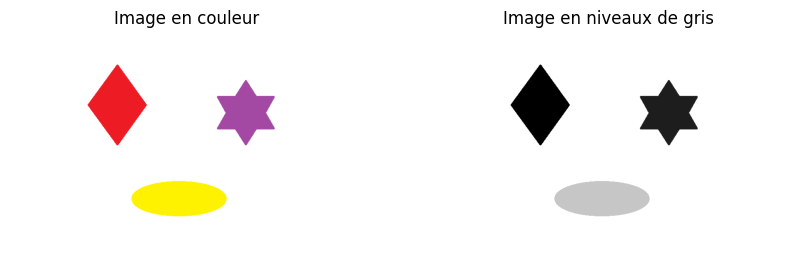

In [15]:
# Charger l'image en couleur
img = cv2.imread("fichiers_cours/traitement_image/formes.png")

# Convertir l'image en niveaux de gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Afficher l'image en couleur sur le premier sous-plot
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image en couleur')
ax[0].axis('off')

# Afficher l'image en niveaux de gris sur le deuxième sous-plot
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Image en niveaux de gris')
ax[1].axis('off');

#### 10-1-3-1 Seuillage Binaire

Appliquons maintenant un seuillage binaire à l'image, en choisissant un niveau gris au dessous duquel on mettra la valeur des pixels à zero (noir), c'est le seuil,  et un niveau de fond, c'est la valeur qu'on donnera à tous pixels au dessus du seuil (généralement 255 blanc).

reth1 =  220.0


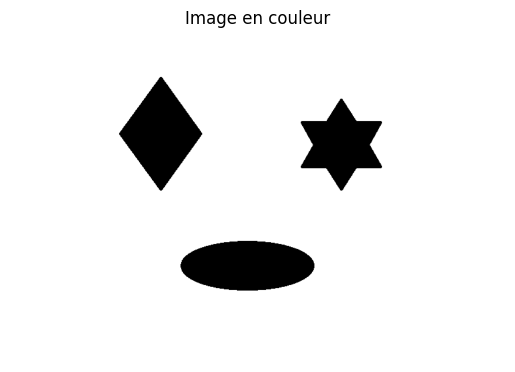

In [17]:
seuil = 220
fond = 255

ret1,threshold=cv2.threshold(img_gray,seuil,fond,cv2.THRESH_BINARY) 
print('reth1 = ',ret1)


fig,ax = plt.subplots()
ax.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
ax.set_title('Image en couleur')
ax.axis('off');

En jouant sur fond, on peut afficher un fond gris

reth1 =  220.0


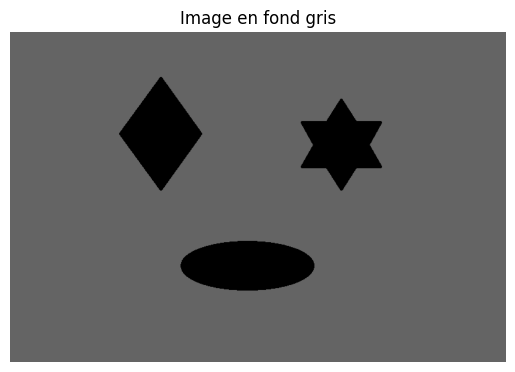

In [18]:
seuil = 220
fond = 100

ret1,threshold=cv2.threshold(img_gray,seuil,fond,cv2.THRESH_BINARY) 
print('reth1 = ',ret1)

fig,ax = plt.subplots()
ax.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
ax.set_title('Image en fond gris')
ax.axis('off');

Sur notre figure, testons différents niveaux de seuil, attention, ici pour des question d'affichage, nous utiliserons un THRESH_BINARY_INV qui mettra le fond à zero et les objets à 255 :

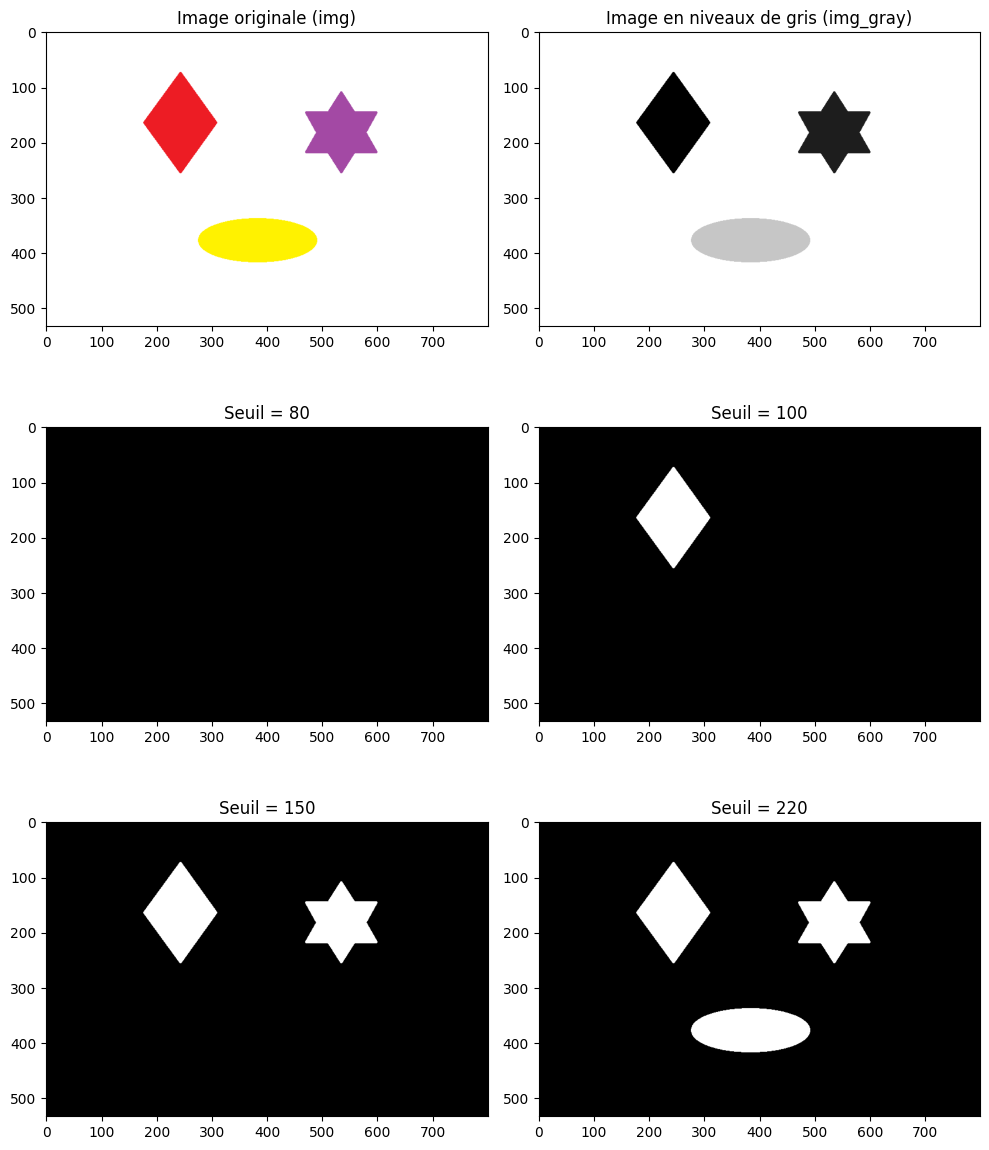

In [19]:
from matplotlib import pyplot as plt

seuils = [80,100,150,220]
# Créer une grille de sous-graphiques (3 lignes, 2 colonnes)
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Afficher l'image originale (img)
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image originale (img)')

# Afficher l'image en niveaux de gris (img_gray)
axes[0, 1].imshow(img_gray, cmap='gray')
axes[0, 1].set_title('Image en niveaux de gris (img_gray)')

# Boucle sur les seuils et afficher les images seuillées
for i, s in enumerate(seuils,start=1): # start = 1 car on a deja des subplots en 0 et 1
    ret1, threshold = cv2.threshold(img_gray, s, 255, cv2.THRESH_BINARY_INV)
    row = (i + 1) // 2
    col = (i + 1) % 2
    axes[row, col].imshow(threshold, cmap='gray')
    axes[row, col].set_title(f'Seuil = {s}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


On a donc des niveaux de gris differents pour les 3 formes geometriques.   

#### 10-1-3-2 Seuillage de Masque

On peut également creer un masque pour selectionner une plage de valeurs de pixels. Attention, dans la partie 10-1-1-2 le mask concernait une zone de l'image, c'est à dire des coordonnées de pixels. Ici c'est un masque sur des intensités, on choisit une plage d'intensités. 

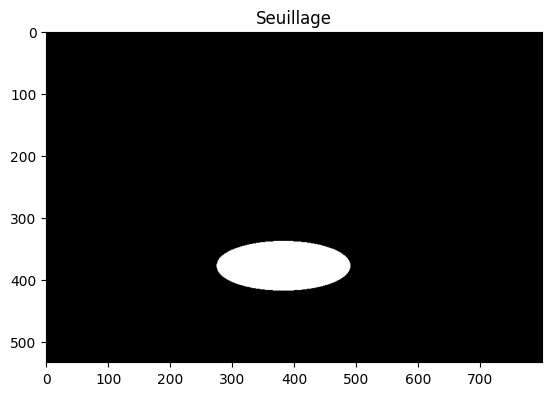

In [20]:
# Définir les seuils haut et bas
seuil_bas = 200
seuil_haut = 250

# Appliquer le seuillage
mask = cv2.inRange(img_gray, seuil_bas, seuil_haut)

fig,ax = plt.subplots()
ax.imshow(mask,cmap='gray')#, cv2.COLOR_BGR2RGB))
ax.set_title('Seuillage');

#### 10-1-3-3 Seuillage Adaptatif

Les seuils adaptatifs permettent d'adapter le seuil en fonction de la zone de l'image, c'est à dire en fonction des pixels voisins. Ceci permet de travailler sur des images avec des eclairages irréguliers.
La documentation OpenCv fournit l'exemple suivant:

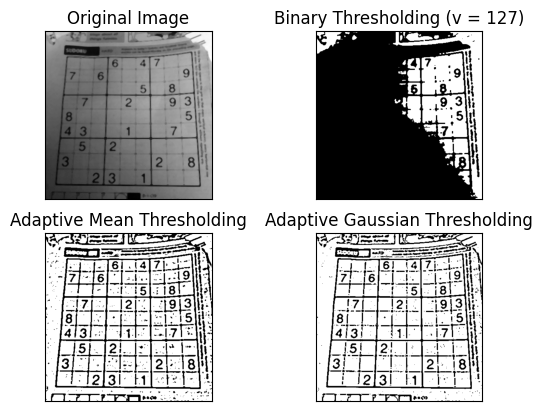

In [21]:
import cv2 as cv
img = cv.imread('fichiers_cours/traitement_image/sudoku.png', cv.IMREAD_GRAYSCALE)

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Binary Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

D'autres types de seuillages sont disponibles dans la [doc OpenCV](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)

#### 10-1-3-4 Seuillage sur des couleurs

L'espace des couleurs HSV (Hue, Saturation, Luminance) est un modèle de représentation des couleurs qui sépare les informations de teinte, de saturation et de luminance d'une couleur. Il est souvent utilisé dans le domaine du traitement d'images et de la vision par ordinateur pour faciliter la manipulation et la détection des couleurs. 

- Teinte (H - Hue) :
La teinte représente la couleur elle-même. Elle est mesurée en degrés sur le cercle chromatique, où chaque degré correspond à une couleur spécifique.
La plage de valeurs de la teinte dans l'espace HSV est généralement de 0 à 360 degrés, mais dans OpenCV, elle est souvent normalisée à une plage de 0 à 179 pour tenir compte des limitations de stockage.

- Saturation (S - Saturation) :
La saturation mesure l'intensité de la couleur. Une saturation élevée signifie des couleurs vives et éclatantes, tandis qu'une saturation faible conduit à des couleurs plus ternes et proches du gris.
La plage de valeurs de la saturation dans l'espace HSV est de 0 à 255 dans OpenCV.

- Luminance (V - Value) ou Brillance (B - Brightness) :
La luminance représente la luminosité ou la brillance de la couleur. Une luminance élevée signifie une couleur plus claire, tandis qu'une luminance faible donne une couleur plus sombre.
La plage de valeurs de la luminance dans l'espace HSV est de 0 à 255 dans OpenCV.

On peut visualiser cette representation de la manière suivante:  

![hsv](fichiers_cours/traitement_image/hsv1.jpg)


Pour trouver les valeurs, on peut s'aider d'une carte de couleur ou d'un [calculateur de couleurs](https://www.selecolor.com/en/hsv-color-picker/) Attention H est limité à 180° sur OpenCv.

Appliquons cette detection à nos tournesols

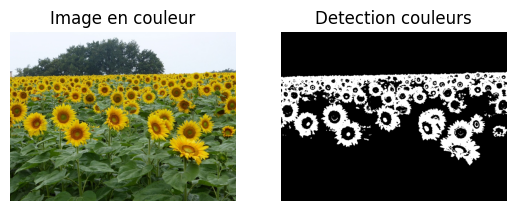

In [22]:
# Charger l'image
img = cv2.imread("fichiers_cours/traitement_image/tournesols.jpg")

# Convertir l'image BGR en image HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Définir les plages de couleur pour le jaune dans l'espace HSV (on peut s'aider de
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Créer un masque en utilisant les plages spécifiées
mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

fig,ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image en couleur')
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Detection couleurs')
ax[1].axis('off');




## 10-1-4 Détection de contours

#### 10-1-4-1 Filtre de Canny

Pour détecter les contours d'un objet, On peut appliquer des filtres comme un filtre de Canny, c'est un algorithme détecte les contours en trouvant les changements d'intensité dans une image. Il inclut plusieurs étapes, y compris la réduction du bruit, la recherche de gradients, et la suppression des pixels non-maxima.

https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

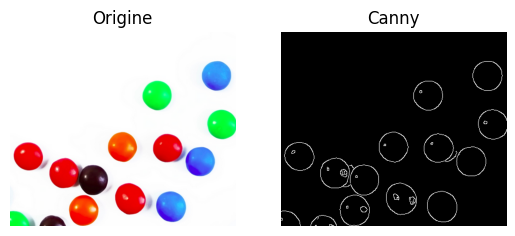

In [23]:
img = cv2.imread("fichiers_cours/traitement_image/bonbons.png")

seuil_bas = 150 
seuil_haut = 550
# img_blur = cv2.blur(img_gray,(3,3))

edges = cv2.Canny(img, seuil_haut, seuil_bas) 

fig,ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Origine')
ax[0].axis('off')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny')
ax[1].axis('off');

#### 10-1-4-2 Transformée de Hough

La tranformée de Hough permet de reconnaitre des formes comme des cercles ou des lignes

Text(0.5, 1.0, 'Cercles détectés')

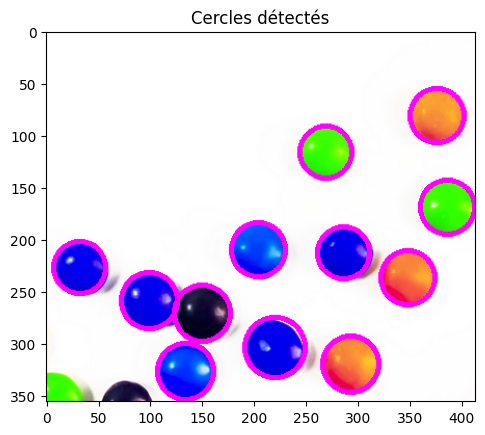

In [24]:
import cv2
# Paramètres pour la transformée de Hough
resolution_accumulator = 1
min_distance_between_circles = 10
threshold_canny = 100
threshold_accumulator = 30
min_radius = 1
max_radius = 30

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Appliquer la transformée de Hough pour détecter les cercles
circles = cv2.HoughCircles(
    img_gray,
    cv2.HOUGH_GRADIENT,
    dp=resolution_accumulator,
    minDist=min_distance_between_circles,
    param1=threshold_canny,
    param2=threshold_accumulator,
    minRadius=min_radius,
    maxRadius=max_radius
)

# Convertir les coordonnées en entiers
circles = circles.astype(np.uint16)

# Dessiner les cercles détectés sur l'image
for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 255), 3)

# Afficher l'image avec les cercles détectés
fig,ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.set_title('Cercles détectés')

# plt.imshow(img, cmap='gray')
# plt.title('Cercles détectés')
# plt.show()



cv2.HoughCircles renvoit un tableau numpy de la forme  [[[x1, y1, r1], [x2, y2, r2], ..., [xn, yn, rn]]] avec x et y coordonnées du centre et r rayon.

On peut jouer sur les paramètres:  

- resolution_accumulator :  Représente la résolution de l'accumulateur en pixels. Une valeur de 1 signifie que l'accumulateur a la même résolution que l'image d'entrée. Une résolution plus élevée peut accélérer le processus de détection, mais elle peut également être moins précise.

- param1 : Seuil pour le détecteur de gradient. Il s'agit du seuil supérieur utilisé par le détecteur de contours de Canny, qui est intégré dans le processus de détection de cercles.  
Une valeur plus élevée de param1 signifie que seuls les contours plus forts sont considérés comme des candidats pour la détection de cercles.  


- param2 : Seuil pour  l'accumulateur de Hough.Une valeur plus petite de param2 signifie que moins de candidats potentiels (cercles) seront considérés comme valides. Cela aide à éliminer les cercles faux.



Detection de lignes avec tranformée de Hough

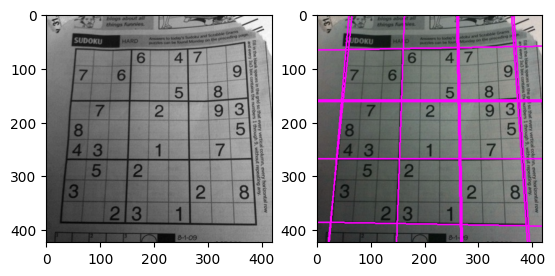

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('fichiers_cours/traitement_image/sudoku.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Appliquer un flou pour réduire le bruit et faciliter la détection des contours
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Détection des contours avec Canny
edges = cv2.Canny(blurred, 50, 200, None, 3)

# Appliquer la transformée de Hough pour détecter les lignes
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)

# Dessiner les lignes détectées sur l'image originale

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 255), 2)



fig,ax = plt.subplots(1,2)
ax[0].imshow(img_gray,cmap = 'gray')
ax[1].imshow(img)


#### 10-1-4-3 Contours

La fonction **findContours** est utilisée pour trouver et extraire les contours dans une image. Elle prend en entrée une image binaire (par exemple, résultat d'un seuillage) et retourne une liste de contours.  
Contrairement à un filtre de canny qui retournera une image, la fonction **findcontours** retournera une liste de coordonnées de points définissant les contours. Ceci sera très utile pour extraire des mesures de dimension par exemple.

Il faut commencer par seuiller l'image

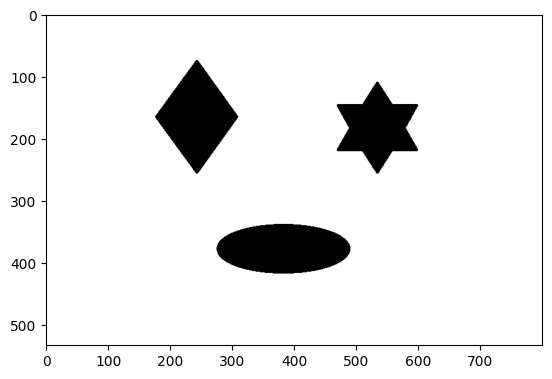

250.0


In [26]:
img = cv2.imread("fichiers_cours/traitement_image/formes.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret1,threshold=cv2.threshold(img_gray,250,255,cv2.THRESH_BINARY)  
plt.imshow(threshold,cmap = 'gray')
plt.show()
print(ret1)

Puis on détecte les contours

In [27]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [28]:
print(len(contours),' contours trouves')
print('Le contour n°1 comporte', contours[1].shape[0],'points')

4  contours trouves
Le contour n°1 comporte 192 points


Affichons un des contours détectés.

In [29]:
# Commenté pour la présentation du notebook
print(contours[1]) 

[[[366 338]]

 [[367 337]]

 [[398 337]]

 [[399 338]]

 [[411 338]]

 [[412 339]]

 [[420 339]]

 [[421 340]]

 [[426 340]]

 [[427 341]]

 [[432 341]]

 [[433 342]]

 [[437 342]]

 [[438 343]]

 [[442 343]]

 [[443 344]]

 [[445 344]]

 [[446 345]]

 [[449 345]]

 [[450 346]]

 [[452 346]]

 [[453 347]]

 [[455 347]]

 [[456 348]]

 [[458 348]]

 [[459 349]]

 [[461 349]]

 [[462 350]]

 [[464 350]]

 [[465 351]]

 [[466 351]]

 [[467 352]]

 [[468 352]]

 [[469 353]]

 [[470 353]]

 [[471 354]]

 [[472 354]]

 [[473 355]]

 [[474 355]]

 [[476 357]]

 [[477 357]]

 [[480 360]]

 [[481 360]]

 [[487 366]]

 [[487 367]]

 [[489 369]]

 [[489 370]]

 [[490 371]]

 [[490 373]]

 [[491 374]]

 [[491 381]]

 [[490 382]]

 [[490 384]]

 [[489 385]]

 [[489 386]]

 [[487 388]]

 [[487 389]]

 [[480 396]]

 [[479 396]]

 [[477 398]]

 [[476 398]]

 [[474 400]]

 [[473 400]]

 [[472 401]]

 [[471 401]]

 [[470 402]]

 [[469 402]]

 [[468 403]]

 [[467 403]]

 [[466 404]]

 [[465 404]]

 [[464

In [30]:
print('Dimensions du tableau hierachy = ',hierarchy.shape)
print(hierarchy)

Dimensions du tableau hierachy =  (1, 4, 4)
[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]]]


- threshold: L'image seuillée à partir de laquelle les contours seront extraits.

- cv2.RETR_TREE: Le mode de récupération de contours. Il spécifie la manière dont les contours sont organisés dans la hiérarchie. cv2.RETR_TREE crée une structure de hiérarchie complète et reconstruit tous les contours.

- cv2.CHAIN_APPROX_SIMPLE: La méthode d'approximation des contours. Elle spécifie comment les contours doivent être stockés après l'approximation. cv2.CHAIN_APPROX_SIMPLE compresse les segments laisse seulement leurs points finaux.

La fonction retourne:

- contours: Un tuple contenant tous les contours trouvés dans l'image seuillée. Chaque contour est représenté sous forme de tableau numpy 2D contenant les coordonnées (x, y) des points constituant le contour.

- hierarchy: Une structure de données représentant la hiérarchie entre les contours. Elle est souvent utilisée pour identifier les contours internes et externes. Dans ce cas, elle n'est pas utilisée directement dans le code que vous avez fourni.

Le tableau hierarchy contient un tableau de 4 valeurs par contour.   
Ces 4 valeurs représentent:   
- Next: Index du contour suivant sur le même niveau hiérarchique.
- Previous: Index du contour précédent sur le même niveau hiérarchique.
- First_Child: Index du premier contour enfant.
- Parent: Index du contour parent.
      
Par exemple la premiere ligne [-1, -1, 1, -1] indique:
- Next (-1): Il n'y a pas de contour suivant sur le même niveau, donc la valeur est -1.
- Previous (-1): Il n'y a pas de contour précédent sur le même niveau, donc la valeur est -1.
- First_Child (1): Il a un contour enfant, et le premier contour enfant a l'index 1.
- Parent (-1): Il n'a pas de contour parent.
C'est le contours qui contient tous les autres.   
La ligne [ 4  2 -1  0] indique:
- Next (4): Il y a un contour suivant sur le même niveau, et son indice est 4.
- Previous (2): Il y a un contour précédent sur le même niveau, et son indice est 2.
- First_Child (-1): Il n'y a pas de contour enfant, donc la valeur est -1.
- Parent (0): Il a un contour parent, et son indice est 0.

Traçons les contours

4 contours detectes


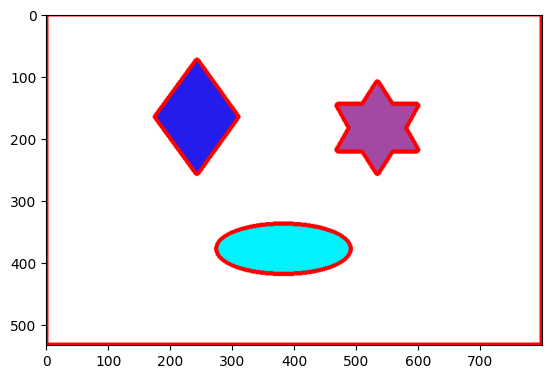

In [31]:

for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)

print(len(contours),'contours detectes')

plt.imshow(img)
plt.show()

Ajoutons les numeros de chaque contour:

4 contours détectés


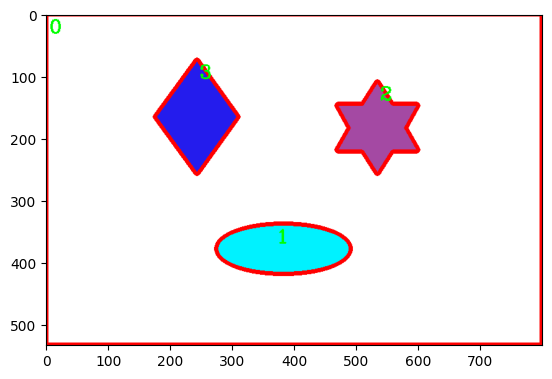

In [32]:
for i, cnt in enumerate(contours):
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)
    x, y = cnt[0][0]# x et y representent le premier point de chaque contour

    cv2.putText(img, str(i), (x+5,y+30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2) # +5 et +30 pour que le zero soit dans l'image

print(len(contours), 'contours détectés')

plt.imshow(img)
plt.show()

On peut englober les formes détéctées dans des rectangles. Ceci nous permettra de réaliser des mesures. Détectons les rectangles et plaçons un point vert au centre de chacun.

((399.5, 266.0), (532.0, 799.0), 90.0)
((382.5, 377.5), (217.0, 81.0), 0.0)
((534.0, 182.5), (130.36050415039062, 150.82623291015625), 60.2551155090332)
((242.96470642089844, 165.0257568359375), (149.81248474121094, 111.47516632080078), 53.88065719604492)


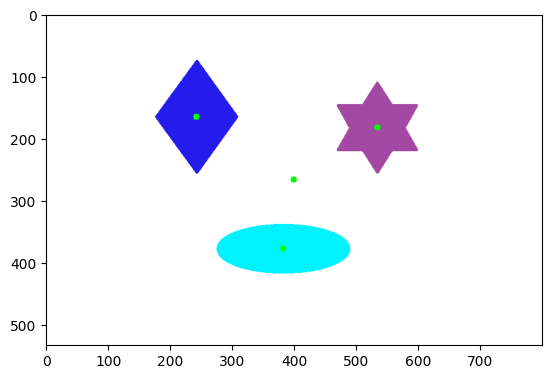

In [33]:
img = cv2.imread("fichiers_cours/traitement_image/formes.png")
for cnt in contours:
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    print(rect)
    # Décomposition du tuple rect[0] pour obtenir les coordonnées x et y
    coord0 = (int(rect[0][0]), int(rect[0][1]))
    cv2.circle(img, coord0, 5, (0, 255, 0), -1) #point vert au centre de chaque rectangle

plt.imshow(img)
plt.show()

rect[0] : coordonnées du centre du rectangle.  
rect[1] : dimensions du rectangle (largeur, hauteur).  
rect[2] : l'angle de rotation du rectangle.

On peut convertir ces valeurs avec cv2.boxPoints():  
<pre>box = cv2.boxPoints(rect)</pre>
Box contient les coordonnées des 4 angles du rectangle


Utilisons les coordonnées récupérées par rect pour tracer les rectangles.

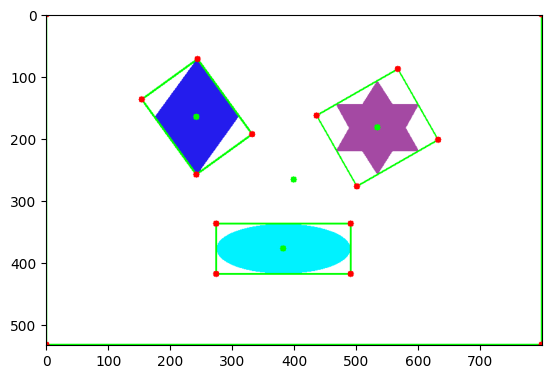

In [34]:
img = cv2.imread("fichiers_cours/traitement_image/formes.png")
for cnt in contours:
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)  # Dessiner le rectangle en rouge
    coord0 = tuple(map(int,rect[0]))
    cv2.circle(img, coord0, 5, (0, 255, 0), -1)

    # Point rouge à chaque coin du rectangle
    for i in range(len(box)):
        cv2.circle(img, tuple(box[i]), 5, (255, 0, 0), -1)


plt.imshow(img)
plt.show()

Calculons les rapports de convexité  en divisant l'aire du contour d'origine par l'aire du polygone convexe. Cela permet d'évaluer à quel point le contour est convexe. Plus le rapport est proche de 1, plus le contour est convexe

1.0
0.9900396272892792
0.7185562146131033
0.9873007295325588


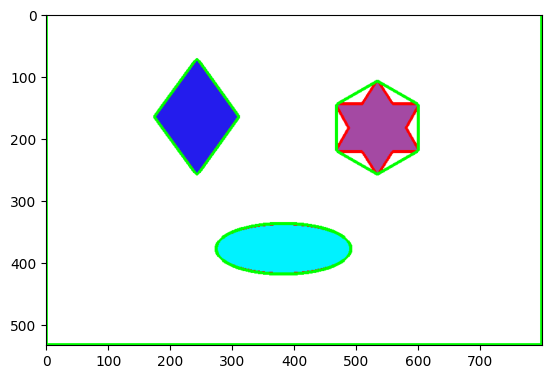

In [35]:
img = cv2.imread("fichiers_cours/traitement_image/formes.png")
import cv2
for cnt in contours:
    # Dessiner les contours originaux (Rouge)
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 3)

    # Calculer le polygone convexe
    hull = cv2.convexHull(cnt)

    # Calculer la surface du polygone convexe et la surface du contour d'origine
    area_hull = cv2.contourArea(hull)
    area_contour = cv2.contourArea(cnt)

    # Calculer le ratio de convexité
    ratio_convexite = area_contour / area_hull
    print(ratio_convexite)
                   
    # Dessiner le polygone convexe (vert)
    cv2.drawContours(img, [hull], -1, (0, 255, 0), 3)

plt.imshow(img)
plt.show()


Dans le cas des formes convexes, contour et hull sont confondus et on a un ration de 1, par contre l'étoile qui est concave a un ratio inferieur à 1.

### 10-1-4-4 Préparation à la détection de contours: Filtres

Si on a un fond bruité, la détection devient compliquée, on peut avoir besoin d'appliquer des filtres à l'image, utilisons ici **cv2.blur** qui fera une moyenne des pixels par zone et apportera un flou à l'image. D'autre filtres peuvent être utilisés (GaussianBlur MedianBlur...)

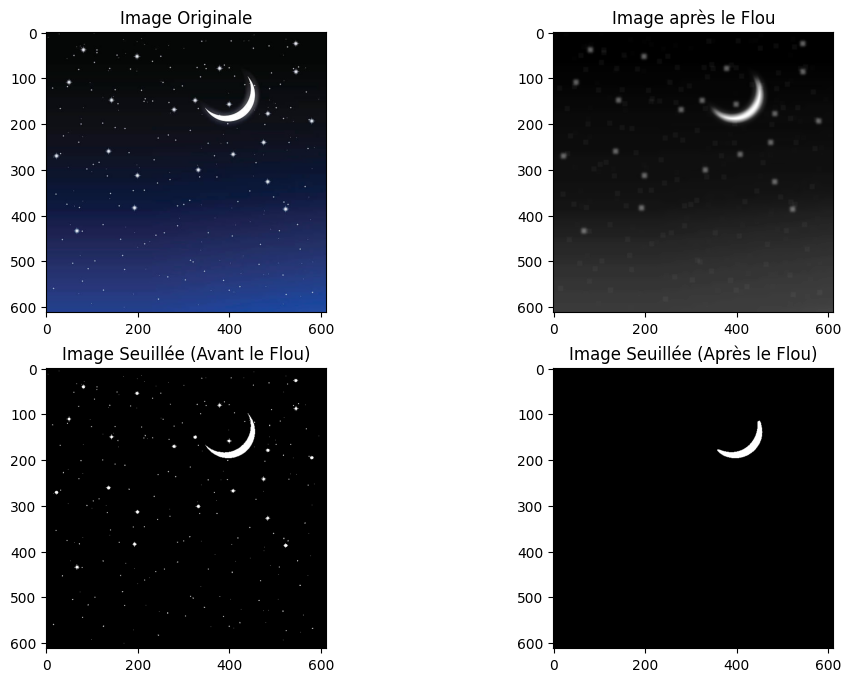

In [36]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("fichiers_cours/traitement_image/moon.jpg")

# Convertir en niveaux de gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer le flou
img_blur = cv2.blur(img_gray, (11, 11))

# Appliquer le seuillage avant le flou
ret1, threshold1 = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)

# Appliquer le seuillage après le flou
ret2, threshold2 = cv2.threshold(img_blur, 140, 255, cv2.THRESH_BINARY)

# Créer une figure avec des sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Afficher l'image originale
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image Originale')

# Afficher l'image après le flou
axes[0, 1].imshow(img_blur, cmap='gray')
axes[0, 1].set_title('Image après le Flou')

# Afficher l'image seuillée avant le flou
axes[1, 0].imshow(threshold1, cmap='gray')
axes[1, 0].set_title('Image Seuillée (Avant le Flou)')

# Afficher l'image seuillée après le flou
axes[1, 1].imshow(threshold2, cmap='gray')
axes[1, 1].set_title('Image Seuillée (Après le Flou)')

plt.show()



Cette étape préliminaire permettra de "simplifier" l'image avant de faire la detection de contours. L'effet sera de ne détecter que les contours des objets principaux.

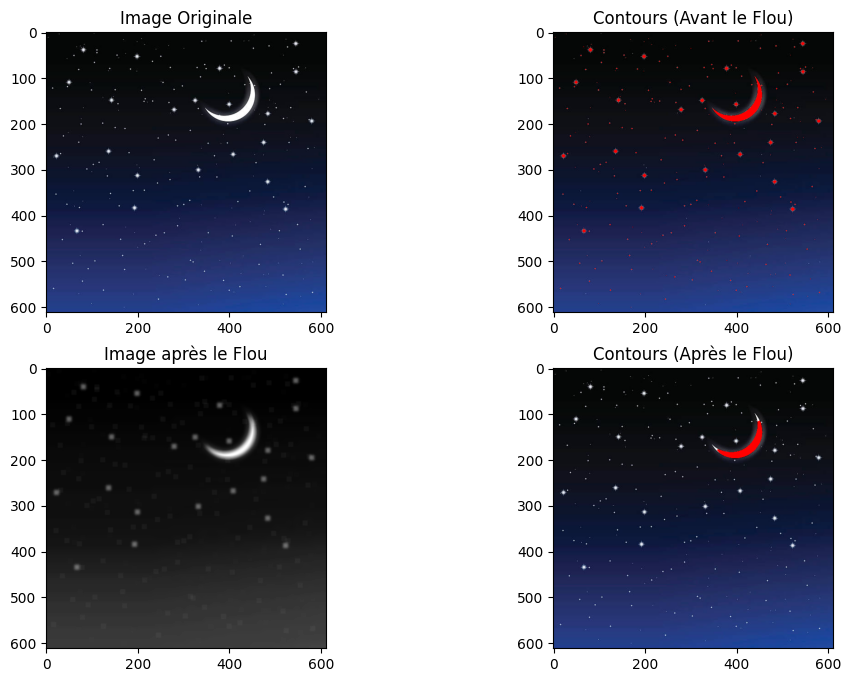

Nombre de contours (Avant le Flou): 247
Nombre de contours (Après le Flou): 1


In [37]:
contours1, hierarchy1 = cv2.findContours(threshold1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(threshold2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Créer une figure avec des sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Afficher l'image originale
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image Originale')

# Afficher les contours avant le flou
img_contours1 = img.copy()
for cnt in contours1:
    cv2.drawContours(img_contours1, [cnt], -1, (0, 0, 255), -1)
axes[0, 1].imshow(cv2.cvtColor(img_contours1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Contours (Avant le Flou)')

# Afficher l'image après le flou
axes[1, 0].imshow(img_blur, cmap='gray')
axes[1, 0].set_title('Image après le Flou')

# Afficher les contours après le flou
img_contours2 = img.copy()
for cnt in contours2:
    cv2.drawContours(img_contours2, [cnt], -1, (0, 0, 255), -1)
axes[1, 1].imshow(cv2.cvtColor(img_contours2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Contours (Après le Flou)')

plt.show()

print("Nombre de contours (Avant le Flou):", len(contours1))
print("Nombre de contours (Après le Flou):", len(contours2))

# 10-2 La bibliothèque Scikit Image

Scikit-image est dédiée au traitement et à la manipulations d'images scientifiques alors que OpenCv est plus axé sur la vision par ordinateur. Cette bibliothèque offre des outils puissants pour le prétraitement, la segmentation et l'extraction de caractéristiques. Les algorithmes utilisés sont souvent mieux documentés donc plus adaptés à un usage scientifique.

## 10-2-1 Opérations morphologiques

Les opérations morphologiques sont des techniques de traitement d'images visant à manipuler la forme et la structure des objets. Elles incluent l'érosion, qui réduit la taille des objets en retirant leurs bords, et la dilatation, qui les agrandit en ajoutant des pixels autour. Ces opérations, utilisant des éléments structurants comme des disques ou des carrés, sont efficaces pour traiter des problèmes tels que la suppression de bruit, la séparation d'objets connectés, et la détection de contours. Les opérations morphologiques jouent un rôle crucial dans la préparation d'images pour l'analyse et la reconnaissance d'objets dans le domaine du traitement d'images.

Ouvrons d'abord une image avec scikit image.io

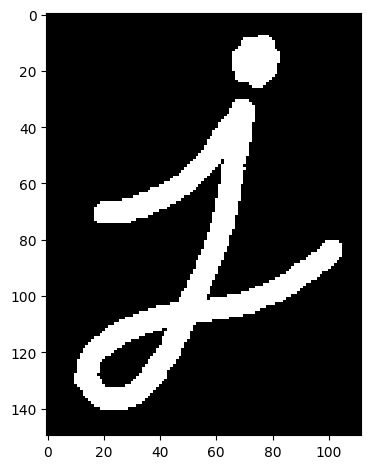

In [38]:
import cv2
import skimage.io as io

# Load the image
image_path = "fichiers_cours/traitement_image/j.png"
image = io.imread(image_path)
#convertir l'image en niveaux de gris
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
io.imshow(image)
io.show()

### 10-2-1-1 Erosion

Un élément structurant est une petite forme géométrique, telle qu'un carré ,utilisé dans les opérations morphologiques sur les images, ici un disque de rayon 2 pixels. Il agit comme un motif pour définir le comportement de l'opération morphologique, comme l'érosion ou la dilatation. L'élément structurant "balaye" l'image pixel par pixel, déterminant comment les pixels voisins influencent le résultat de l'opération.

L'érosion va globalement afiner les traits, elle peut être utilisée spécifiquement pour la suppression de bruit ou pour la séparation d'objets connectés sur une image.

(-0.5, 111.5, 149.5, -0.5)

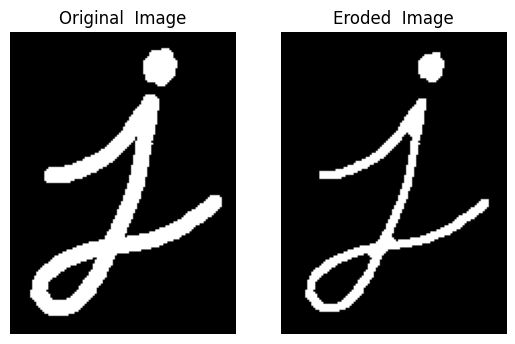

In [39]:
from skimage.morphology import erosion, disk
import matplotlib.pyplot as plt

footprint = disk(2)  # Element structurant
eroded_image = erosion(image, footprint)

fig,ax = plt.subplots(1,2)
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original  Image')
ax[1].imshow(eroded_image, cmap=plt.cm.gray)
ax[1].set_title('Eroded  Image')
ax[0].axis('off')
ax[1].axis('off')

### 10-2-2 Dilatation

La dilatation va globalement épaissir les traits, elle peut ête utilisé en préparation de la detection de contours ou pour boucher des trous dans un objet.

(-0.5, 111.5, 149.5, -0.5)

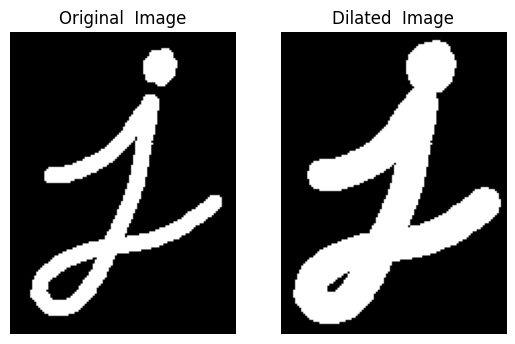

In [40]:
from skimage.morphology import dilation

# Apply dilation with a disk-shaped structuring element
footprint_dilation = disk(6)  # You can adjust the size of the disk
dilated_image = dilation(eroded_image, footprint_dilation)

fig,ax = plt.subplots(1,2)
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original  Image')
ax[1].imshow(dilated_image, cmap=plt.cm.gray)
ax[1].set_title('Dilated  Image')
ax[0].axis('off')
ax[1].axis('off')

### 10-2-3 Algorithme Watershed

L'algorithme Watershed (littéralement "bassin versant" en anglais) est utilisé pour la segmentation, c'est-à-dire la partition d'une image en régions ou objets distincts. Son nom est inspiré par l'analogie avec les bassins versants dans la topographie, où l'eau de pluie s'écoule naturellement vers les points bas formant des bassins.  


- L'algorithme considère l'image comme un relief topographique où les niveaux de gris représentent l'altitude.
- Les régions de l'image où l'intensité des niveaux de gris est élevée sont analogues à des pics de montagnes, et les points bas correspondent à des vallées.
- On simule un remplissage d'eau à partir de ces points bas. L'eau commence à remplir les bassins versants jusqu'à ce que des bassins distincts se rejoignent.
- Les lignes où l'eau se rejoint forment des lignes de partage des eaux, qui servent de frontières pour la segmentation.

Utilisons l'exemple fourni dans la [documentation de Scikit Image](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html) pour l'illustration:

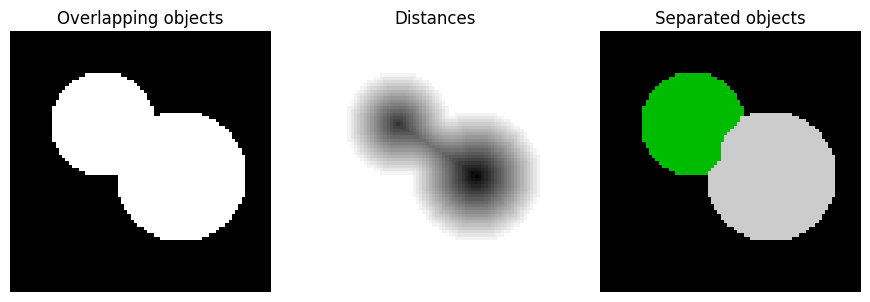

In [41]:
# Overlapping objects, Distances, Separated objects

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

L'image de distances permet de visualiser la distance de chaque pixel au pixel de fond le plus proche. Les pics dans la transformation de distance sont des marqueurs potentiels qui peuvent être utilisés dans la segmentation watershed

A partir de là, on peut détecter les contours

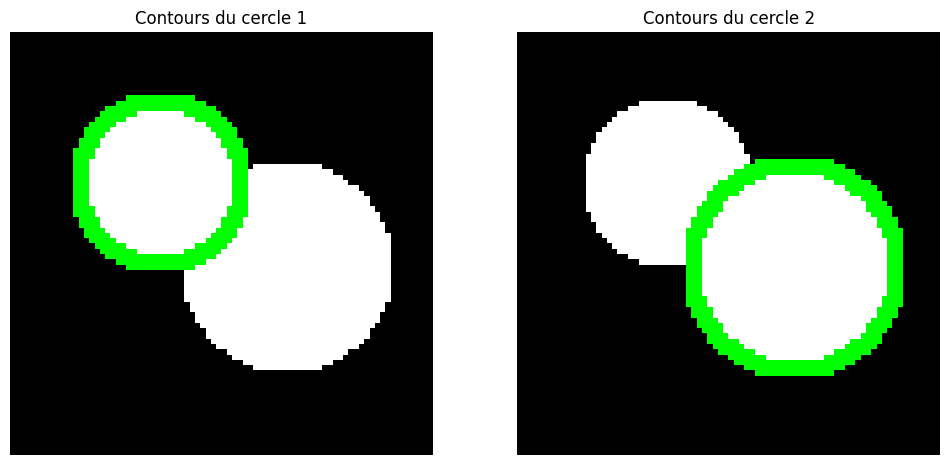

In [42]:
# Convertir l'image en niveaux de gris en image uint8
image_uint8 = image.astype(np.uint8) * 255

# Trouver les contours du cercle 1
contours_circle1, _ = cv2.findContours(mask_circle1.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Trouver les contours du cercle 2
contours_circle2, _ = cv2.findContours(mask_circle2.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer une copie de l'image en couleur pour dessiner les contours
image_with_contours_circle1 = cv2.cvtColor(image_uint8.copy(), cv2.COLOR_GRAY2BGR)
image_with_contours_circle2 = cv2.cvtColor(image_uint8.copy(), cv2.COLOR_GRAY2BGR)

# Dessiner les contours sur les images en couleur
image_with_contours_circle1 = cv2.drawContours(image_with_contours_circle1, contours_circle1, -1, (0, 255, 0), 2)
image_with_contours_circle2 = cv2.drawContours(image_with_contours_circle2, contours_circle2, -1, (0, 255, 0), 2)

# Afficher les deux images avec les contours
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image_with_contours_circle1)
axes[0].set_title('Contours du cercle 1')

axes[1].imshow(image_with_contours_circle2)
axes[1].set_title('Contours du cercle 2')

for ax in axes:
    ax.axis('off')

plt.show()

# 10-3 Traitement de videos

## 10-3-1 Lecture de vidéos avec OpenCv

OpenCv peut ouvrir et lire des fichiers video. 
On ouvre le fichier avec cap = cv2.VideoCapture(chemin) pour ouvrir un fichier ou cap = cv2.VideoCapture(0) pour ouvir la webcam.  
On lit ensuite les frame dans une boucle while.  
Enfin, on prévoit la fermeture , ici avec la touche q et on libère les ressources video et éviter les problèmes de mémoire.

In [43]:
import cv2
# Chemin de la vidéo
video_path = "fichiers_cours/traitement_image/ma_video.mp4"
# Charger la vidéo
cap = cv2.VideoCapture(video_path)
# Boucle pour lire chaque frame de la vidéo
while True:
    # Lire une frame
    ret, frame = cap.read()
    # Quitter la boucle si la frame n'est pas lue correctement
    if not ret:
        break 
    # Afficher la frame en niveaux de gris
    cv2.imshow('Ma Video',frame)  
    # Attendre la touche 'q' pour quitter la boucle
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
# Libérer la capture vidéo
cap.release()
# Fermer toutes les fenêtres
cv2.destroyAllWindows()

## 10-3-2 Traitement des images d'une vidéo

La quasi totalité des outils vus pour les image sera transposable pour le traitement des vidéos. 
Prenons l'exemple de la conversion en niveau de gris qui sera obtenue avec gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [44]:
# Chemin de la vidéo
video_path = "fichiers_cours/traitement_image/ma_video.mp4"
# Charger la vidéo
cap = cv2.VideoCapture(video_path)
# Boucle pour lire chaque frame de la vidéo
while True:
    # Lire une frame
    ret, frame = cap.read()   
    # Quitter la boucle si la frame n'est pas lue correctement
    if not ret:
        break   
    # Convertir la frame en niveaux de gris
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
    # Afficher la frame en niveaux de gris
    cv2.imshow('Gray Video', gray_frame)  
    # Attendre la touche 'q' pour quitter la boucle
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
# Libérer la capture vidéo
cap.release()
# Fermer toutes les fenêtres
cv2.destroyAllWindows()

OpenCv donne également accès à des fonctionnalités s'appuyant sur l'intelligence artificielle, par exemple
cv2.CascadeClassifier(cv2.data.haarcascades)  permet de charger des classificateurs en cascade pré-entraînés utilisés dans la détection d'objets. Les classificateurs en cascade sont des fichiers XML qui contiennent des informations sur la structure d'un modèle de détection d'objet spécifique, entraîné à détecter des caractéristiques visuelles telles que des visages, des yeux, des voitures, etc.

Testons ici la détection de visages.

In [45]:
import cv2
# Chemin de la vidéo
video_path = "fichiers_cours/traitement_image/ma_video.mp4"
# Charger la vidéo
cap = cv2.VideoCapture(video_path)
# Charger le fichier de cascade pour la reconnaissance faciale
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
while True:
    # Lire la frame de la vidéo
    ret, frame = cap.read()
    if not ret:
        break  
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Détecter les visages dans l'image
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    # Dessiner des rectangles autour des visages détectés
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3)
    # Afficher la frame avec les visages détectés
    cv2.imshow('Face Detection', frame)
    # Attendre que la touche 'q' soit pressée pour quitter
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Libérer la capture vidéo
cap.release()
# Fermer toutes les fenêtres
cv2.destroyAllWindows()